<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Numeros_Errores/Actividad03_Convergencia_Truncamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [3]:
import math
import numpy as np
def sin_x(x, tol = 1e-8):
    '''
    Esta función aproxima el valor del seno a través de una serie de Mclaurin
    recibe: x: Valor que está dentro de la función sin(x)
            tol = 1e-8: Tolerancia escogida para aproximar el valor del Sen
    '''
    suma = 0 #La suma empieza con valor 0
    n = 0 #El n empieza desde 0 como lo dice la serie
    termino_anterior = 0 #El termino anterior empieza desde 0 y luego se va transformando en el término evaluado
    aproximaciones = [] #se crea una lista vacía en donde se irá ingresando el valor de la serie en n=m
    while True: #Mientras lo que aparece abajo es verdad entonces se cumple el ciclo
        termino = (((-1)**n)/math.factorial(2*n+1))*x**(2*n+1) #En la variable 'termino' se guardará el valor de la serie
        n += 1 #n irá aumentando en 1
        suma += termino #En la variable suma se irán guardando y sumando los valores evaluados en 'termino'
        aproximaciones.append(suma) #En la lista vacía se irán guardando los valores que se van guardando en la variable suma
        if abs(termino-termino_anterior)<tol: #Si abs(termino-termino_anterior)<tol entonces el ciclo para
            break
        termino = termino_anterior #Sino, entonces el ciclo continua y termino se vuelve igual a termino_anterior
    return suma, aproximaciones #La función retorna la suma en el punto en el que converge y la lista con los valores de la suma antes de que convergiera

In [4]:
val_aprox, aproximaciones = sin_x(np.pi/4) #Se evalúa la función en pi/4 y se guarda en la variable val_aprox y en la lista de aproximaciones
print(val_aprox)
print(aproximaciones)

0.7071067811796194
[0.7853981633974483, 0.7046526512091675, 0.7071430457793603, 0.7071064695751781, 0.7071067829368671, 0.7071067811796194]


In [5]:
val_real = np.sin(np.pi/4) #Se ingresa el valor real de sin(pi/4)
val_aprox, _ = sin_x(np.pi/4)
error_relativo = abs(val_real - val_aprox) / val_real #Se calcula el error relativo
print(val_real)
print(error_relativo) #El error relativo es infinitamente pequeño

0.7071067811865475
9.797690960678494e-12


In [6]:
error_porcentual = error_relativo*100 #Se calcula el error porcentual
print(error_porcentual) #El error porcentual es infinitamente pequeño

9.797690960678495e-10


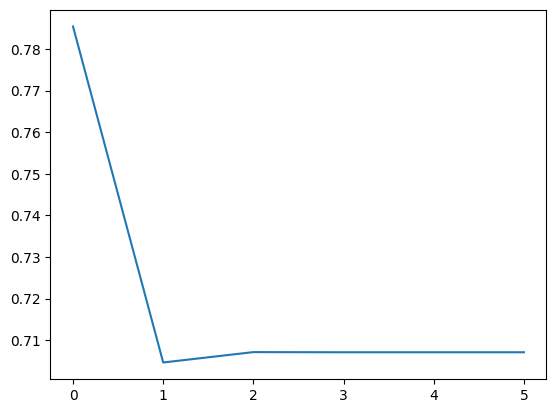

In [7]:
import matplotlib.pyplot as plt
plt.plot(aproximaciones) #Se imprimen las aproximaciones en tol = 1e-8

In [8]:
tolerancias = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8] #Se crea una lista con distintas tolerancias
aprox = [] #Se crea una lista vacía en donde se irán guardando las aproximaciones antes de arrojar el valor
vals_aprox = [] #Se crea una lista donde se irán guardando los valores arrojados con cada tolerancia

for tol in tolerancias: #Para cada elemento dentro de la lista 'tolerancias'
    valor, aproxim = sin_x(np.pi/4, tol) #En la variable valor se guardarán los valores finales arrojados y aproxim los valores que arrojó la función antes de dar el final, también incluye el final
    aprox.append(aproxim) #los valores de aproxim se irán guardando en la lista 'aprox'
    vals_aprox.append(valor) #Los valores de 'valor' se irán guardando en la lista 'vals_aprox'

aprox, vals_aprox #Se imprimen los valores de cada lista, las 5 primeras pertenecen a la lista 'aprox'

([[0.7853981633974483,
   0.7046526512091675,
   0.7071430457793603,
   0.7071064695751781],
  [0.7853981633974483,
   0.7046526512091675,
   0.7071430457793603,
   0.7071064695751781,
   0.7071067829368671],
  [0.7853981633974483,
   0.7046526512091675,
   0.7071430457793603,
   0.7071064695751781,
   0.7071067829368671],
  [0.7853981633974483,
   0.7046526512091675,
   0.7071430457793603,
   0.7071064695751781,
   0.7071067829368671,
   0.7071067811796194],
  [0.7853981633974483,
   0.7046526512091675,
   0.7071430457793603,
   0.7071064695751781,
   0.7071067829368671,
   0.7071067811796194]],
 [0.7071064695751781,
  0.7071067829368671,
  0.7071067829368671,
  0.7071067811796194,
  0.7071067811796194])

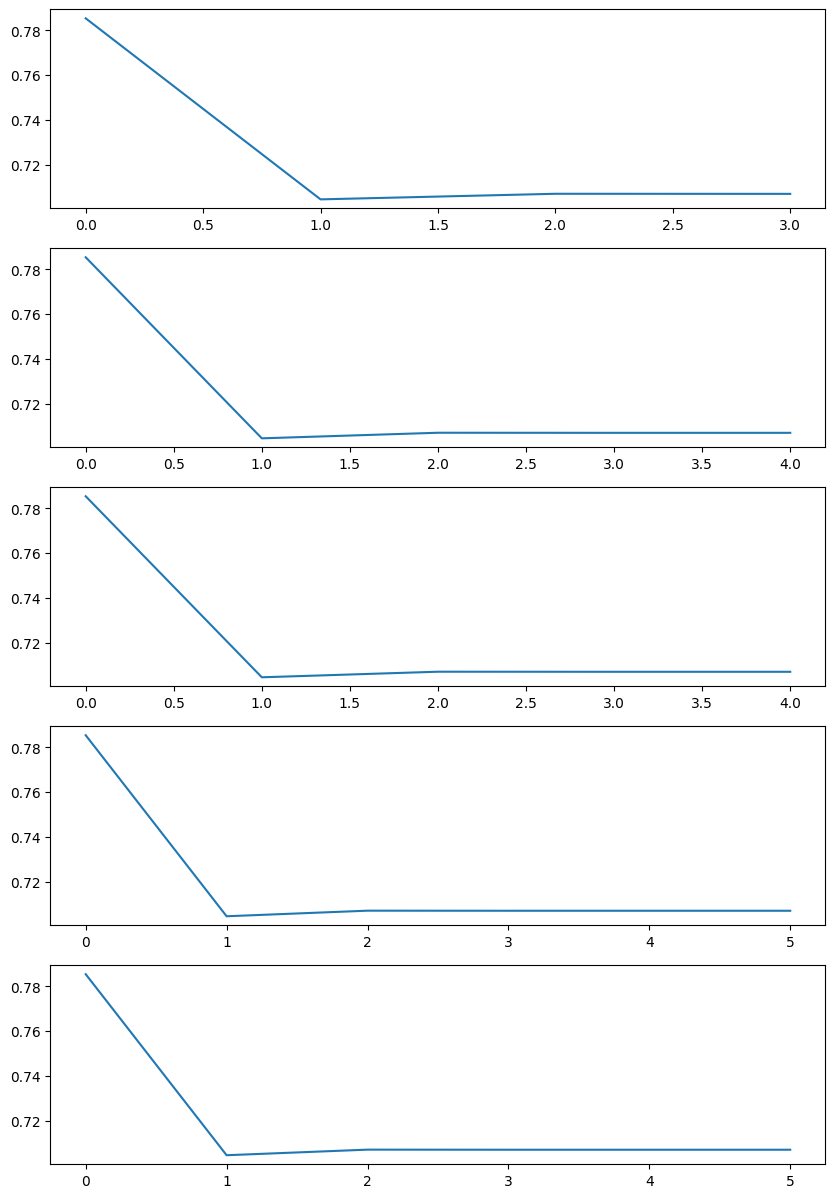

In [9]:
fig, ax = plt.subplots(5, figsize = (10,15)) #plt.subplots nos ayuda a divir una gráfica en distintas subgráficas, figsize nos ayuda a organizar el tamaño, el 5 indica el número de subgráficas
#fig es la figura general donde se guardarán todas las gráficas y ax se refiere a cada espacio para cada subgráfica
for i in range(len(aprox)): #Para cada i dentro del número de elementos de la lista 'aprox'
    ax[i].plot(aprox[i]) #En la subgráfica i grafica los datos que aparecen en la lista 'aprox'

## Para la segunda función

In [10]:
import numpy as np
def ln_1másx(x, tol = 1e-8):
  '''
  Esta función aproxima el valor de ln(1 + x), recibe una x cualquiera y una tolerancia la cual en este caso usé 1e-8
  '''
  n = 1 #La serie empieza desde n = 1
  suma = 0 #La suma empieza con valor 0
  termino_anterior = 0 #El primer termino_anterior es 0
  aproximaciones = [] #Se crea una lista vacía donde irán almacenando las aproximaciones realizadas
  while True:
    termino = (((-1)**(n-1))/n)*x**n
    suma += termino #En la variable suma se irán sumando los terminos que arroje la función
    n += 1 #n se irá sumando de a 1
    aproximaciones.append(suma) #En la lista aproximaciones se irán guardando las sumas que arroja cada termino nuevo
    if abs(termino-termino_anterior)<tol: #Si la tolerania ya es mayor que el valor absoluto de la diferncia del termino presente y el anterior entonces para el ciclo
      break
    termino_anterior = termino #Sino entonces el termino_anterior se transforma en el termino evaluado
  return suma, aproximaciones #La función retorna el valor de la convergencia (suma) y las aproximaciones que se hicieron antes de llegar al resultado

In [11]:
valor_aprox2, aproximaciones2 = ln_1másx(np.pi/4) #En la variable valor_aprox2 se guardará el valor de convergencia de la serie y en aproximaciones2 la lista de las aproximaciones
print(valor_aprox2)
print(aproximaciones2)

0.5796414527855186
[0.7853981633974483, 0.47697302586340584, 0.6384640502399674, 0.5433379847770745, 0.6031074544616998, 0.5639884280304129, 0.5903232950415805, 0.5722253583806793, 0.5848601016826839, 0.5759291279167306, 0.582305828274122, 0.5777149335873268, 0.5810432538230438, 0.5786159155513082, 0.5803952474371693, 0.5790851061916413, 0.5800535603356686, 0.5793351950132846, 0.5798697029336676, 0.5794708914716269, 0.5797692017476541, 0.5795455590566904, 0.5797135707215723, 0.5795871128374208, 0.5796824598357821, 0.5796104546844375, 0.5796649128531098, 0.5796236690555118, 0.5796549448651939, 0.5796311997004936, 0.5796492475154083, 0.5796355157547424, 0.5796459738392099, 0.5796380016600627, 0.5796440840996415, 0.5796394396610138, 0.5796429888071882, 0.5796402746693772, 0.579642351689797, 0.5796407611839745, 0.5796419798965129, 0.5796410455117946, 0.5796417623092306, 0.5796412121326452, 0.5796416346379321, 0.5796413100168574, 0.5796415595490405, 0.5796413676498829, 0.5796415152912667, 0

In [12]:
val_real2 = np.log(1+np.pi/4)
val_aprox2, _ = ln_1másx(np.pi/4)
error_relativo2 = abs(val_real2 - val_aprox2)/val_real2
print(val_real2)
print(error_relativo2)

0.5796414510841191
2.9352618978106116e-09


In [13]:
error_porcentual2 = error_relativo2 * 100
print(error_porcentual2)

2.9352618978106115e-07


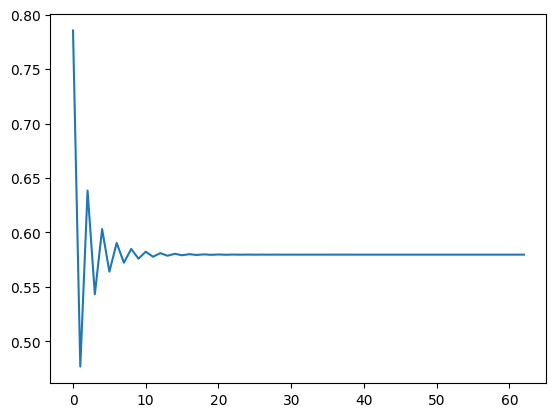

In [14]:
import matplotlib.pyplot as plt
plt.plot(aproximaciones2)

In [15]:
tolerancias2 = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
aproxim_2 = []
vals_arrojado = []
for tol in tolerancias2:
  vals_arrojados, aproxima2 = ln_1másx(np.pi/4)
  aproxim_2.append(aproxima2)
  vals_arrojado.append(vals_arrojados)
tolerancias2, aproxim_2, vals_arrojado

([0.0001, 1e-05, 1e-06, 1e-07, 1e-08],
 [[0.7853981633974483,
   0.47697302586340584,
   0.6384640502399674,
   0.5433379847770745,
   0.6031074544616998,
   0.5639884280304129,
   0.5903232950415805,
   0.5722253583806793,
   0.5848601016826839,
   0.5759291279167306,
   0.582305828274122,
   0.5777149335873268,
   0.5810432538230438,
   0.5786159155513082,
   0.5803952474371693,
   0.5790851061916413,
   0.5800535603356686,
   0.5793351950132846,
   0.5798697029336676,
   0.5794708914716269,
   0.5797692017476541,
   0.5795455590566904,
   0.5797135707215723,
   0.5795871128374208,
   0.5796824598357821,
   0.5796104546844375,
   0.5796649128531098,
   0.5796236690555118,
   0.5796549448651939,
   0.5796311997004936,
   0.5796492475154083,
   0.5796355157547424,
   0.5796459738392099,
   0.5796380016600627,
   0.5796440840996415,
   0.5796394396610138,
   0.5796429888071882,
   0.5796402746693772,
   0.579642351689797,
   0.5796407611839745,
   0.5796419798965129,
   0.57964104551179

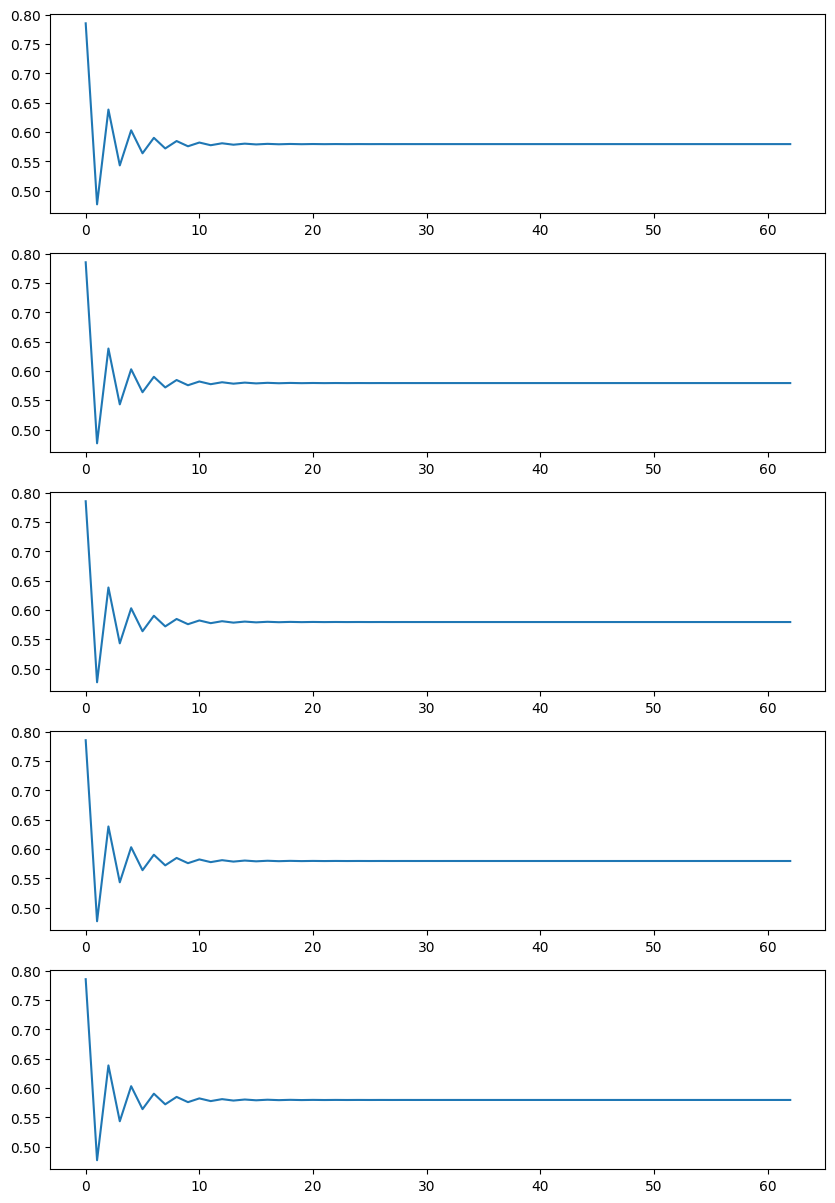

In [16]:
fig2, ax2 = plt.subplots(5, figsize = (10,15))
for i in range(len(aproxim_2)):
  ax2[i].plot(aproxim_2[i])

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



Término   Aproximación        Error absoluto      Error %   
1         1.0000000000        0.2247448714        18.350342 
2         1.2500000000        0.0252551286        2.062073  
3         1.2187500000        0.0059948714        0.489479  
4         1.2265625000        0.0018176286        0.148409  
5         1.2241210938        0.0006237776        0.050931  
6         1.2249755859        0.0002307145        0.018838  
7         1.2246551514        0.0000897200        0.007326  
8         1.2247810364        0.0000361650        0.002953  
9         1.2247298956        0.0000149758        0.001223  
10        1.2247512043        0.0000063329        0.000517  


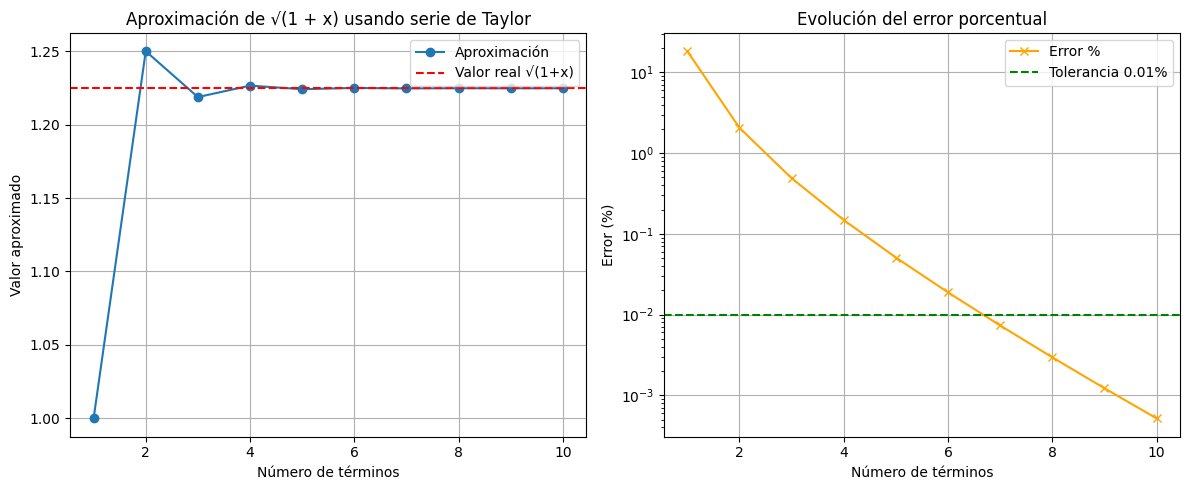

In [17]:
import math
import matplotlib.pyplot as plt

# Definimos el valor donde se evaluará la serie y el número máximo de términos
x = 0.5
valor_verdadero = math.sqrt(1 + x)
max_terminos = 10

# Función que calcula el coeficiente binomial generalizado para exponentes no enteros
def coef_binomial_generalizado(a, n):
    resultado = 1
    for i in range(n):
        resultado *= (a - i)
    return resultado / math.factorial(n)

# Listas para guardar resultados de aproximaciones y errores
valores_aproximados = []
errores_absolutos = []
errores_percentuales = []

# Variable para acumular la suma de la serie
suma_parcial = 0

# Calculamos término a término la serie de Taylor
for termino in range(max_terminos):
    coef = coef_binomial_generalizado(0.5, termino)
    valor_termino = coef * (x ** termino)
    suma_parcial += valor_termino
    valores_aproximados.append(suma_parcial)

    error_abs = abs(valor_verdadero - suma_parcial)
    errores_absolutos.append(error_abs)

    error_pct = (error_abs / valor_verdadero) * 100
    errores_percentuales.append(error_pct)

# Imprimimos los resultados en formato tabla
print(f"{'Término':<10}{'Aproximación':<20}{'Error absoluto':<20}{'Error %':<10}")
for i in range(max_terminos):
    print(f"{i+1:<10}{valores_aproximados[i]:<20.10f}{errores_absolutos[i]:<20.10f}{errores_percentuales[i]:<10.6f}")

# Visualización gráfica de los resultados
plt.figure(figsize=(12, 5))

# Gráfico de la aproximación vs número de términos
plt.subplot(1, 2, 1)
plt.plot(range(1, max_terminos + 1), valores_aproximados, 'o-', label='Aproximación')
plt.axhline(valor_verdadero, color='red', linestyle='--', label='Valor real √(1+x)')
plt.title('Aproximación de √(1 + x) usando serie de Taylor')
plt.xlabel('Número de términos')
plt.ylabel('Valor aproximado')
plt.legend()
plt.grid(True)

# Gráfico del error porcentual en escala logarítmica
plt.subplot(1, 2, 2)
plt.plot(range(1, max_terminos + 1), errores_percentuales, 'x-', color='orange', label='Error %')
plt.axhline(0.01, color='green', linestyle='--', label='Tolerancia 0.01%')
plt.title('Evolución del error porcentual')
plt.xlabel('Número de términos')
plt.ylabel('Error (%)')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()